<a href="https://colab.research.google.com/github/2yLee/DeepLearning-study/blob/main/DeepLearningFromScratch/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#활성화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

계단함수

In [2]:
def step_function(x):
  if x>0 : return 1
  else : return 0

print(step_function(1))
print(step_function(0))
print(step_function(-1))
print(step_function(3.0))

1
0
0
1


In [3]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

x = np.array([-1.0, 1.0, 2.0])
step_function(x)

<ipython-input-3-f67b93ede98e>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


array([0, 1, 1])

계단 함수의 그래프

<ipython-input-3-f67b93ede98e>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


<function matplotlib.pyplot.show(close=None, block=None)>

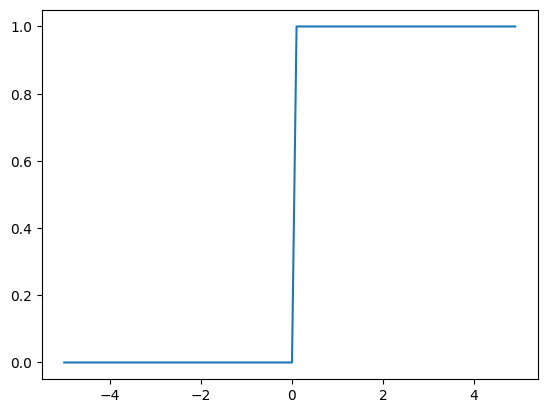

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim = (-0.1, 1.1)
plt.show

시그모이드 함수 구현

In [5]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

<function matplotlib.pyplot.show(close=None, block=None)>

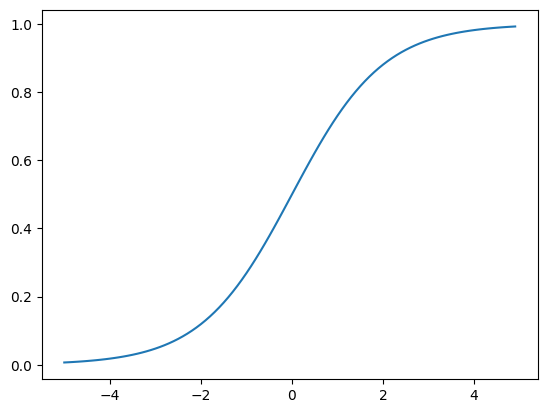

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim = (-0.1, 1.1)
plt.show

ReLU 함수

In [7]:
def ReLU(x):
  return np.maximum(0, x)

x = np.array([-1.0, 1.0, 2.0])
ReLU(x)

array([0., 1., 2.])

행렬의 곱

In [8]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(A.shape)
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


신경망 구현

In [9]:
X = np.array([1.0, 5.0]) # 입력값
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #가중치
B1 = np.array([0.1, 0.2, 0.3]) #편향

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1 #다음 층의 뉴련으로 전달
print(A1)

(2, 3)
(2,)
(3,)
[1.2 2.5 3.8]


활성화 함수 적용

In [10]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[1.2 2.5 3.8]
[0.76852478 0.92414182 0.97811873]


In [11]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.65511646 1.55635206]
[0.65816252 0.82582927]


In [12]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
y = A3  # 출력층
print(A3)
print(y)

[0.33098211 0.72778046]
[0.33098211 0.72778046]


3층 신경망

In [77]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = a3

  return y

network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


소프트맥스 함수

In [14]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = sum(exp_a)
  y = exp_a / sum_exp_a

  return y

x = np.array([2.0, 3.0])
softmax(x)

array([0.26894142, 0.73105858])

MNIST 데이터셋 가져오기

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28*28))
#y_train = to_categorical(y_train)
x_test = x_test.reshape((10000, 28*28))
#y_test = to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


신경망의 추론 처리

In [42]:
import random
def random_weight_bias(row, col):
  weight = np.zeros((row, col))
  bias = [0] * col
  for j in range(col):
    for i in range(row):
      weight[i, j] = random.random()
    bias[j] = random.random()
  return np.array(weight), np.array(bias)
w, b = random_weight_bias(10, 5)

랜덤으로 가중치를 생성하고 pickle을 통한 가중치 저장

In [84]:
import pickle

initial_weights = {}
W, B = w, b = random_weight_bias(784, 512)
initial_weights['W1'] = W
initial_weights['b1'] = B
W, B = w, b = random_weight_bias(512, 256)
initial_weights['W2'] = W
initial_weights['b2'] = B
W, B = w, b = random_weight_bias(256, 10)
initial_weights['W3'] = W
initial_weights['b3'] = B

# 가중치를 Pickle 파일로 저장
with open('sample_weight.pkl', 'wb') as file:
    pickle.dump(initial_weights, file)

# Pickle 파일에서 가중치 로드
with open('sample_weight.pkl', 'rb') as file:
    loaded_weights = pickle.load(file)

# 로드된 가중치 확인
print("Loaded Weights:", loaded_weights)


Loaded Weights: {'W1': array([[0.18017618, 0.79547148, 0.9358035 , ..., 0.91684266, 0.41966482,
        0.20278666],
       [0.75801261, 0.0863464 , 0.77199973, ..., 0.19330948, 0.79049464,
        0.80651959],
       [0.80595568, 0.66094861, 0.76004844, ..., 0.66712912, 0.70844675,
        0.70260273],
       ...,
       [0.5680191 , 0.12764144, 0.07310807, ..., 0.06945701, 0.78568945,
        0.91162359],
       [0.03874468, 0.88733261, 0.3843361 , ..., 0.77509873, 0.27037439,
        0.40333874],
       [0.69223047, 0.42371312, 0.77722296, ..., 0.52160791, 0.11909233,
        0.22361532]]), 'b1': array([3.47470187e-01, 8.63811288e-01, 1.56817194e-01, 6.21742385e-01,
       5.63922490e-01, 2.72144280e-01, 7.18560976e-01, 4.53305861e-01,
       2.16846523e-01, 8.58166819e-01, 6.36074911e-01, 9.48104010e-01,
       2.38491603e-01, 8.94660998e-01, 3.33289204e-01, 7.18966832e-02,
       8.06347235e-01, 4.05127248e-01, 8.50486900e-01, 4.08663180e-01,
       7.98415391e-01, 7.56209353e-01,

In [85]:
def get_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  return x_test.reshape((x_test.shape[0], 28*28)), y_test


def init_network():
  with open('sample_weight.pkl', 'rb') as file:
    network = pickle.load(file)
    return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

임의로 설정한 가중치이므로 정확도는 약 10%(label이 10개이므로)

In [91]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.

  if p == t[i]:
    accuracy_cnt += 1

print(f'Accuracy: {float(accuracy_cnt) / len(x)}')

Accuracy: 0.098
